In [133]:
# Remove mensagens de aviso das bibliotecas (no seu dia a dia, é interessante deixar as mensagens, mas aqui na aula vou presar pela limpeza visual)
import warnings
warnings.filterwarnings("ignore")

# **Introdução ao conjunto de dados**

Para o nosso estudo, vamos usar um base de dados com informações sobre o sistema cardiovascular e ataques cardíacos. Os dados já foram previamente tratados pelo autor, portanto podemos direcionar nosso foco à visualização.<br>
Esses dados estão disponíveis no [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

**Dicionário de dados**
- Age: idade do paciente

- Sex: sexo do paciente [M: Homem, F: Mulher]

- ChestPainType: tipo de dor peitoral [TA: angina típica, ATA: angina atípica, NAP: dor não anginal, ASY: assintomático]

- RestingBP: pressão sanguínea em repouso [mmHg]

- Cholesterol: colesterol [mm/dl]

- FastingBS: açúcar no sangue em jejum [1: se FastingBS > 120 mg/dl, 0: se não]

- RestingECG: resultado do eletrocardiograma sob repouso [Normal: Normal, ST: anormalidade de onda ST-T, LVH: apresenta hipertrofia ventricular esquerda provável ou definitiva, conforme critério de Estes]

- MaxHR: frequência cardíaca máxima atingida [entre 60 e 202]

- ExerciseAngina: angina induzida por exercício [Y: Sim, N: Não]

- Oldpeak: oldpeak = ST

- ST_Slope: a inclinação do pico do segmento ST do exercício [Up: ascendente, Flat: plano, Down: descendente]

- HeartDisease: resultado [1: doença cardíaca, 0: normal]



In [134]:
import pandas as pd

df = pd.read_csv('Dados/heart.csv', sep=',')
display(df.head())
display(df.info())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None

Nosso dataframe possui 918 registros e 12 features. Possui 6 colunas do tipo inteiro, 1 float e 5 com strings.<br>
Como dito, já passou por um prévio tratamento antes da disponibilização, e não há necessidade de tratamento de inconsistências, tipagem de dados ou missing values.

In [135]:
# Tradução do nome das features

colunas_pt = {
    'Age': 'idade',
    'Sex': 'sexo',
    'ChestPainType': 'tipo_dor_peitoral',
    'RestingBP': 'pressao_repouso',
    'Cholesterol': 'colesterol',
    'FastingBS': 'acucar_jejum',
    'RestingECG': 'ecg_repouso',
    'MaxHR': 'freq_cardiaca_max',
    'ExerciseAngina': 'angina_exercicio',
    'Oldpeak': 'old_peak',
    'ST_Slope': 'inclinacao_st',
    'HeartDisease': 'doenca_cardiaca'
}

df = df.rename(columns=colunas_pt)

# Tradução das categorias para melhor a visualização nos gráficos
# Caso fôssemos preparar os dados para treinar um modelo de machine learning, provavelmente seria uma escolha interessante remapear as categorias binárias para 0 e 1 e fazer One Hot-Enconding para as com mais de duas categoria.

categorias = {
    'M': 'Homem',
    'F': 'Mulher',
    'Flat': 'Plano',
    'Up': 'Ascendente',
    'Down': 'Descendente',
    'N': 'Não',
    'Y': 'Sim',
    'LVH': 'Hipertrofia ventricular',
    'ST': 'Anormalidade de onda',
    'TA': 'Angina típica',
    'ATA': 'Angina atípica',
    'ASY': 'Assintomático',
    'NAP': 'Dor não anginal'
}

categoria_acucar_jejum = {
    1: 'Maior que 120 mg/dl',
    0: 'Menor ou igual a 120 mg/dl'
}

df = df.replace(categorias)
df['acucar_jejum'] = df['acucar_jejum'].replace(categoria_acucar_jejum)

# Criando uma coluna de IDs
df['id_paciente'] = df['idade'].astype(str) + '_' + df['sexo'] + '_' + df.index.astype(str)

df.head()

,idade,sexo,tipo_dor_peitoral,pressao_repouso,colesterol,acucar_jejum,ecg_repouso,freq_cardiaca_max,angina_exercicio,old_peak,inclinacao_st,doenca_cardiaca,id_paciente
0,40,Homem,Angina atípica,140,289,Menor ou igual a 120 mg/dl,Normal,172,Não,0.0,Ascendente,0,40_Homem_0
1,49,Mulher,Dor não anginal,160,180,Menor ou igual a 120 mg/dl,Normal,156,Não,1.0,Plano,1,49_Mulher_1
2,37,Homem,Angina atípica,130,283,Menor ou igual a 120 mg/dl,Anormalidade de onda,98,Não,0.0,Ascendente,0,37_Homem_2
3,48,Mulher,Assintomático,138,214,Menor ou igual a 120 mg/dl,Normal,108,Sim,1.5,Plano,1,48_Mulher_3
4,54,Homem,Dor não anginal,150,195,Menor ou igual a 120 mg/dl,Normal,122,Não,0.0,Ascendente,0,54_Homem_4


# **Visualizando correlações**

Correlação é uma medida estatística que mede a relação entre fenômenos. Mais comumente utilizada para a medição, o coeficiente de correlação de Pearson varia de -1 a 1, sendo os extremos correlação perfeitas inversamente ou diretamente proporcionais, respectivamente. 0 representa fenômenos sem correlação.

<img src="Imagens/correlacoes.png" alt="Correlações" width="800">

<br>

> Importante destacar que **correlação não implica causalidade.**

Dois fenômenos que possuem forte correlações podem não ter qualquer relação de causa e efeito, como pode ser observado no site [Spurious Correlations](https://www.tylervigen.com/spurious-correlations).
<br>

Avaliar correlações entre features pode nos ajudar a responder muitos problemas e é uma etapa muito presente em análises exploratórias. Não somente isso, existem modelos de aprendizado de máquina para aprendizado de correlações, como os modelos de regressão.

## **Gráfico de dispersão**

In [136]:
df.head()

,idade,sexo,tipo_dor_peitoral,pressao_repouso,colesterol,acucar_jejum,ecg_repouso,freq_cardiaca_max,angina_exercicio,old_peak,inclinacao_st,doenca_cardiaca,id_paciente
0,40,Homem,Angina atípica,140,289,Menor ou igual a 120 mg/dl,Normal,172,Não,0.0,Ascendente,0,40_Homem_0
1,49,Mulher,Dor não anginal,160,180,Menor ou igual a 120 mg/dl,Normal,156,Não,1.0,Plano,1,49_Mulher_1
2,37,Homem,Angina atípica,130,283,Menor ou igual a 120 mg/dl,Anormalidade de onda,98,Não,0.0,Ascendente,0,37_Homem_2
3,48,Mulher,Assintomático,138,214,Menor ou igual a 120 mg/dl,Normal,108,Sim,1.5,Plano,1,48_Mulher_3
4,54,Homem,Dor não anginal,150,195,Menor ou igual a 120 mg/dl,Normal,122,Não,0.0,Ascendente,0,54_Homem_4


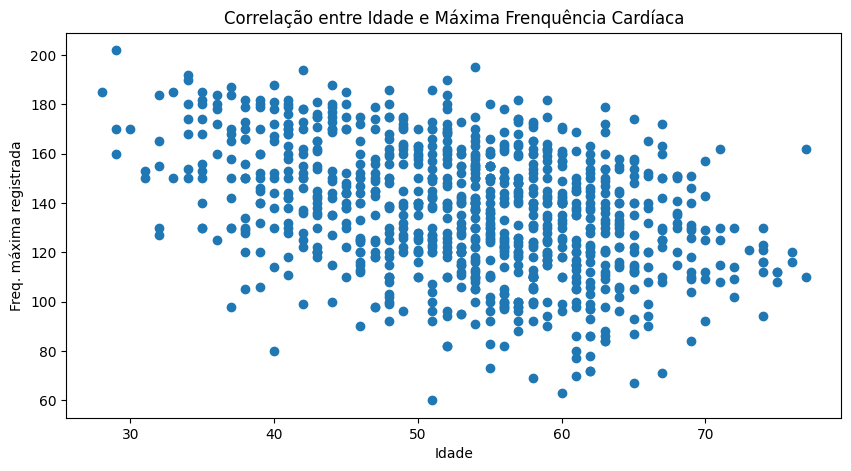

In [137]:
import matplotlib.pyplot as plt

# Criando os objetos Figure e Axes
fig, ax = plt.subplots(
    figsize=(10,5) # Define o tamanho da Figure (largura, altura)
)

ax.scatter(x=df.idade, y=df.freq_cardiaca_max)
ax.set_title('Correlação entre Idade e Máxima Frenquência Cardíaca')
ax.set_xlabel('Idade')
ax.set_ylabel('Freq. máxima registrada')

plt.show()

A gráfico apresenta uma dispersão muito forte, mas ainda é possível notar uma **tendência a correlação negativa** - com o aumento da idade a frequência máxima registrada aparenta diminuir.
<br>
Vamos fazer algumas implementação para melhorar a nossa vizualização.

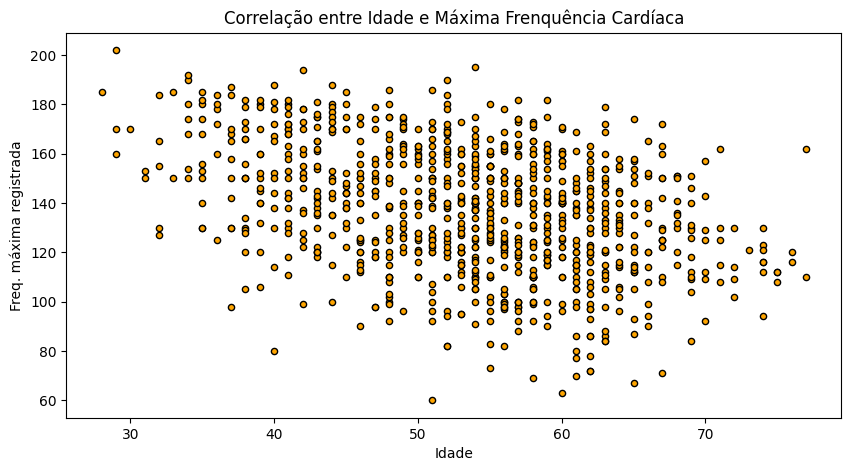

In [138]:
fig, ax = plt.subplots(
    figsize=(10,5) # Define o tamanho da Figure (largura, altura)
)

ax.scatter(
    x=df.idade, 
    y=df.freq_cardiaca_max,
    c='orange', # Cor das marcações
    edgecolors='black', # Contorno das marcações
    s=20 # Tamanho das marcações
    )
ax.set_title('Correlação entre Idade e Máxima Frenquência Cardíaca')
ax.set_xlabel('Idade')
ax.set_ylabel('Freq. máxima registrada')

plt.show()

Podemos usar o numpy para calcular uma reta de regressão.
<br>

Quando falamos sobre regressões, estamos no campo das funções. Uma regressão linear é uma função que objetiva explicar o comportamento de uma variável dependente (y) por sua correlação com uma ou mais variáveis preditoras (x).<br>
Em nosso exemplo, vamos considerar a variável dependente y como a frequência cardíaca e a variável preditora x como a idade. Em posse da função, podemos estimar os valores da frequência cardíaca com base na idade e plotar no gráfico. Quanto maior a correlação entre y e x, melhor a capacidade preditiva.
<br>

Vamos limitar nossa discussão sobre modelos lineares generalizados por aqui. [Saiba mais](https://ebaconline.com.br/blog/regressao-linear-seo)

A reta de regressão estimada vai nos ajudar a melhorar a visualização do nosso gráfico.

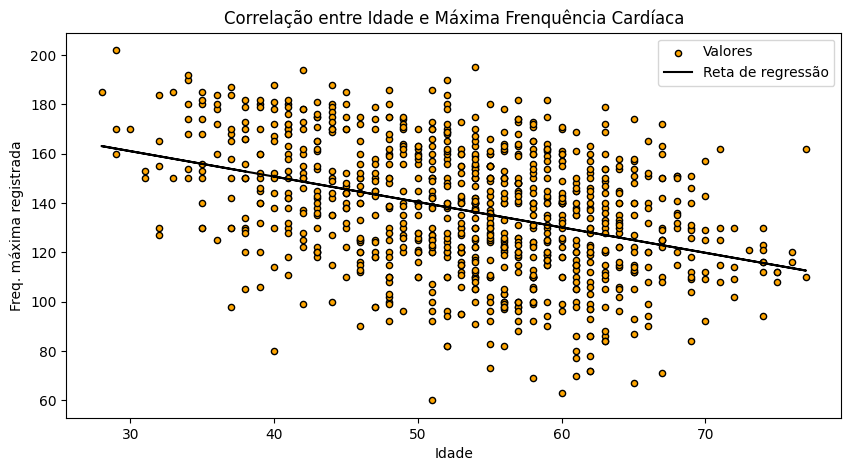

In [139]:
import numpy as np

# Estima a reta de regressão
coef_ang, intercepto = np.polyfit(df['idade'], df['freq_cardiaca_max'], 1)

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(
    x=df['idade'], 
    y=df['freq_cardiaca_max'],
    c='orange', 
    edgecolors='black',
    s=20,
    label='Valores' # Define o nome da legenda do Axes
    )

# Adiciona o gráfico de linhas ao Axes
ax.plot(
    df['idade'],
    intercepto + coef_ang*df['idade'], # Uma função de regressão linear é estimada por alfa + beta * variável preditora
    color='black',
    label='Reta de regressão' # Define o nome da legenda do Axes
    )

ax.set_title('Correlação entre Idade e Máxima Frenquência Cardíaca')
ax.set_xlabel('Idade')
ax.set_ylabel('Freq. máxima registrada')
ax.legend() # Adiciona a legenda ao Axes

plt.show()

O gráfico de linha foi plotado sobre o gráfico de dispersão.<br>
Aqui, a reta nos ajuda a confirmar o que suspeitamos na primeira plotagem, que há uma correlação negativa não muito forte entre Idade e Máxima Frequência Cardíaca.

# **Visualizando Categorias**
Quando temos a necesidade de visualizar alguma métrica (contagem, média, desvio padrão, percentual do todo) por categorias, comumente são utilizados os gráficos de barras ou setores (pizza).<br>

## **Gráfico de Barras**
O gráfico de barras é um dos gráficos mais utilizados na comunicação visual.
- É de fácil interpretação;
- Os zeros se alinham;
- É fácil de se identificar diferenças pequenas, mesmo sem rótulos dos dados;
- Sua leitura é feita no formato Z (da mesma forma que lemos).

Vamos visualizar a média do colesterol para homens e mulheres.<br>
Para isso, precisamos agrupar nosso dataframe pela coluna "sexo" e calcular a média da coluna "colesterol" para cada categoria da feature agrupada.

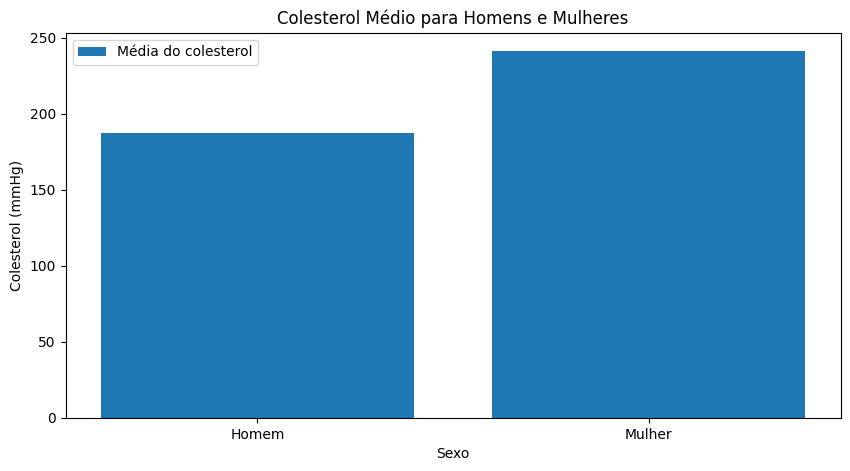

In [140]:
# Cria o agrupamento por sexo e calcula a média do colesterol para cada um
agrupamento_barras = df[['sexo', 'colesterol']].groupby(by='sexo').mean()

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(
    agrupamento_barras.index, 
    agrupamento_barras['colesterol'],
    label='Média do colesterol',
    )

ax.set_title('Colesterol Médio para Homens e Mulheres')
ax.set_xlabel('Sexo')
ax.set_ylabel('Colesterol (mmHg)')
ax.legend()

plt.show()

Pelo gráfico, notamos que, em média, o grupo de mulheres em nosso conjunto de dados possui um colesterol mais alto do que os homens.<br>
Vamos adicionar mais uma informação ao gráfico. Dessa vez, o colesterol máximo registrado para cada sexo.

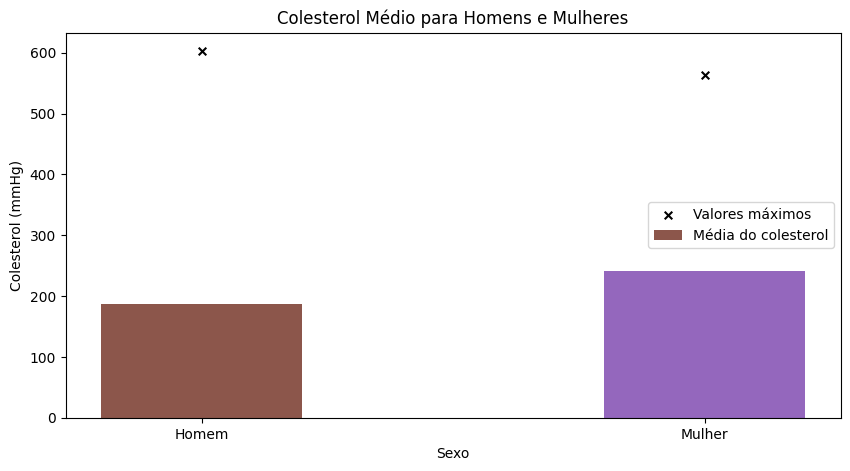

In [141]:
# Agrupa o sexo, calculando a média e o valor máximo para cada categoria
agrupamento_barras = df[['sexo', 'colesterol']].groupby(by='sexo').agg(['mean', 'max'])

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(
    x=agrupamento_barras.index, 
    height=agrupamento_barras[('colesterol', 'mean')],
    width=0.4, # Determina a largura das barras
    label='Média do colesterol',
    color=['tab:brown', 'tab:purple'] # Escolha de cores para as barras
    )

# Usamos o gráfico de dispersão para plotar os 2 pontos no Axes que representam o colesterol máximo para cada sexo
ax.scatter(
    x=agrupamento_barras.index, 
    y=agrupamento_barras[('colesterol', 'max')],
    marker='x', # Define o tipo da marcação
    s=30,
    color='black',
    label='Valores máximos'
    )

ax.set_title('Colesterol Médio para Homens e Mulheres')
ax.set_xlabel('Sexo')
ax.set_ylabel('Colesterol (mmHg)')
ax.legend(loc='center right') # Define a posição da legenda ('upper left', 'upper right', 'lower left', 'lower right', 'upper center', 'lower center', 'center left', 'center right')

plt.show()

Apesar de ter uma média menor, o valor máximo do colesterol para homens foi maior. Isso é um indício de que a dispersão dos registros de colesterol para homens pode ser maior.<br>
Existem gráficos para visualizar dispersões que vamos ver em seguida.

Os gráficos de barra podem ser criados também na horizontal.<br>
Quando o nome das cateogorias é muito grande, pode ser melhor usar barras horizontais, para que o eixo X fique com melhor apresentação e mais fácil leitura.

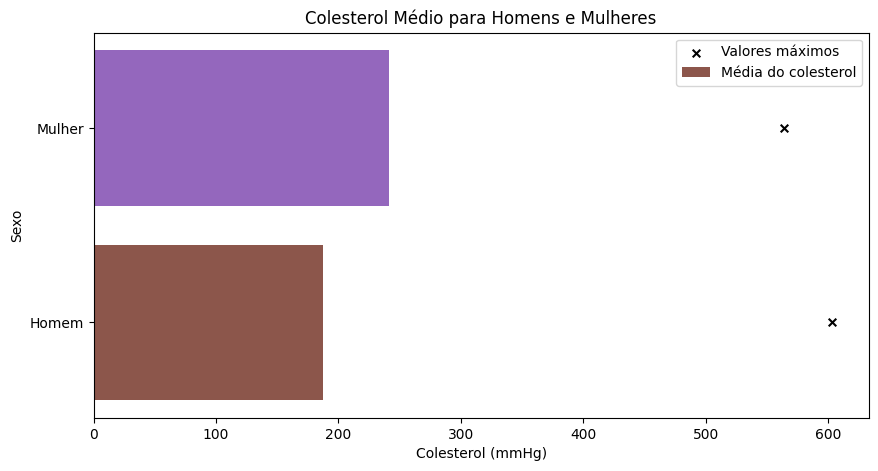

In [142]:
fig, ax = plt.subplots(figsize=(10,5))

ax.barh(
    y=agrupamento_barras.index, 
    width=agrupamento_barras[('colesterol', 'mean')],
    label='Média do colesterol',
    color=['tab:brown', 'tab:purple']
    )

ax.scatter(
    y=agrupamento_barras.index, 
    x=agrupamento_barras[('colesterol', 'max')],
    marker='x',
    s=30,
    color='black',
    label='Valores máximos'
    )

ax.set_title('Colesterol Médio para Homens e Mulheres')
ax.set_ylabel('Sexo')
ax.set_xlabel('Colesterol (mmHg)')
ax.legend(loc='upper right')

plt.show()

## **Gráfico de Setores (Pizza)**

Gráficos de setores são bastante populares e podem ser bons para ter uma noção das partes de um todo.<br>

No entanto, devem ser feita algumas ressalvas quanto ao seu uso. Como não há uma referência de zero comum, como nas barras, pode ser difícil de visualizar qual classe é maior, principalmente em gráficos 3D. Quanto mais categorias são inseridas no gráfico, mais difícil pode ficar sua compreensão.<br>

Pessoalmente, quase não uso este tipo de gráfico e, quando uso, não passo de 3 categorias.<br>

> O seu uso não é proibido e não minha intenção não é fazer isso, mas alertá-los contra possíveis armadilhas.

In [143]:
df[['tipo_dor_peitoral', 'id_paciente']].groupby(by='tipo_dor_peitoral').count()

,id_paciente
tipo_dor_peitoral,
Angina atípica,173
Angina típica,46
Assintomático,496
Dor não anginal,203


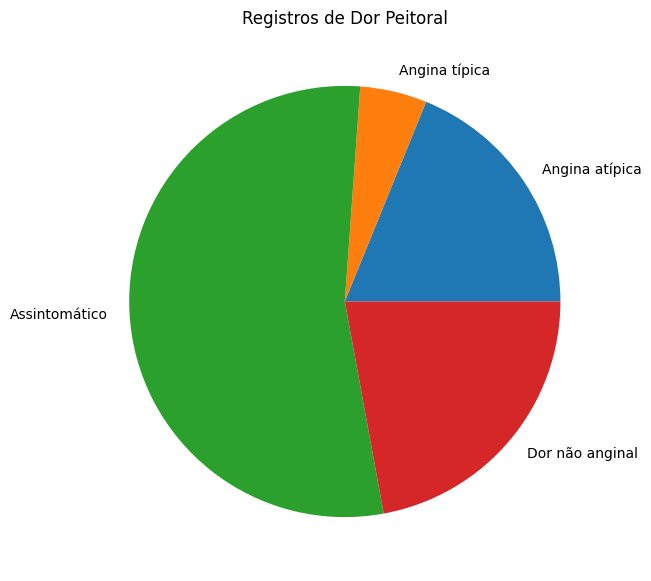

In [144]:
agrupamento_setores = df[['tipo_dor_peitoral', 'id_paciente']].groupby(by='tipo_dor_peitoral').count()

fig, ax = plt.subplots(figsize=(7,7))

ax.pie(
    agrupamento_setores['id_paciente'], 
    labels=agrupamento_setores.index
    )

ax.set_title('Registros de Dor Peitoral')

plt.show()

Um gráfico deve tornar a análise intuitiva.<br>
Nesta visualização, sem usar rótulos, é difícil afimar se temos mais dores "Angina atípica" ou "Dor não anginal". Neste caso, um gráfico de barras horizontais pode ser melhor.

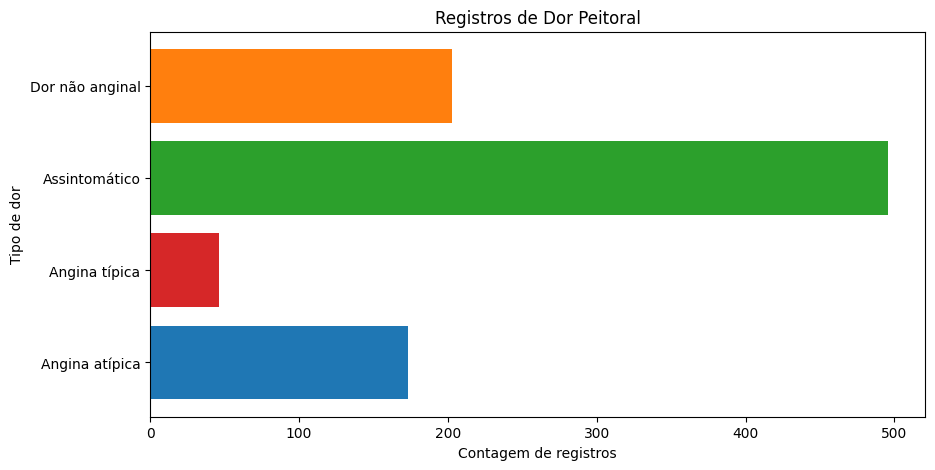

In [145]:
fig, ax = plt.subplots(figsize=(10,5))

ax.barh(
    y=agrupamento_setores.index, 
    width=agrupamento_setores['id_paciente'],
    color=['tab:blue', 'tab:red', 'tab:green', 'tab:orange']
    )

ax.set_title('Registros de Dor Peitoral')
ax.set_xlabel('Contagem de registros')
ax.set_ylabel('Tipo de dor')

plt.show()

Agora, fica fácil de se identificar que a "Dor não anginal" é levemente superior.<br>

Vamos ver um exemplo em que o gráfico de setores pode funcionar bem.

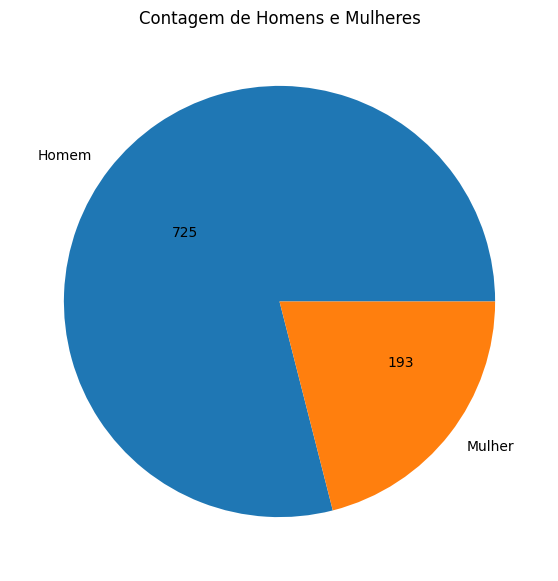

In [146]:
agrupamento_setores = df[['sexo', 'colesterol']].groupby(by='sexo').count()

fig, ax = plt.subplots(figsize=(7,7))

ax.pie(
    agrupamento_setores['colesterol'], 
    labels=agrupamento_setores.index
    )

ax.set_title('Contagem de Homens e Mulheres')
ax.text(x=-0.5, y=0.3, s=agrupamento_setores['colesterol'][0]) # Adiciona uma string ao Axes com valor da contagem para a categoria "Homem"
ax.text(x=0.5, y=-0.3, s=agrupamento_setores['colesterol'][1]) # Adiciona uma string ao Axes com valor da contagem para a categoria "Mulher"

plt.show()

Aqui usamos apenas duas categorias e visualização ficou intuitiva e deixa clara a noção de partes do todo, mesmo que não tivéssemos usado os rótulos.

# **Visualizando Distribuições**

Visualizar distribuições nos ajuda a compreender como os nossos dados numéricos estão dispostos, se estão mais concentrados ou mais dispersos, se existem muitos valores discrepantes.<br>
Vimos no nosso gráfico de barras que o valor máximo de colesterol registrado foi para um homem, mesmo a média para homens sendo menor. Vamos ver como os valores de colesterol estão distribuídos para homens e mulheres.

## **Histograma**

O histograma, ou gráfico de distribuição de frequência, é um gráfico de barras que agrupa intervalos ou categorias por barra e contabiliza cada uma delas ao longo de eixo.<br>
Com ela, podemos entender a concentração dos dados.

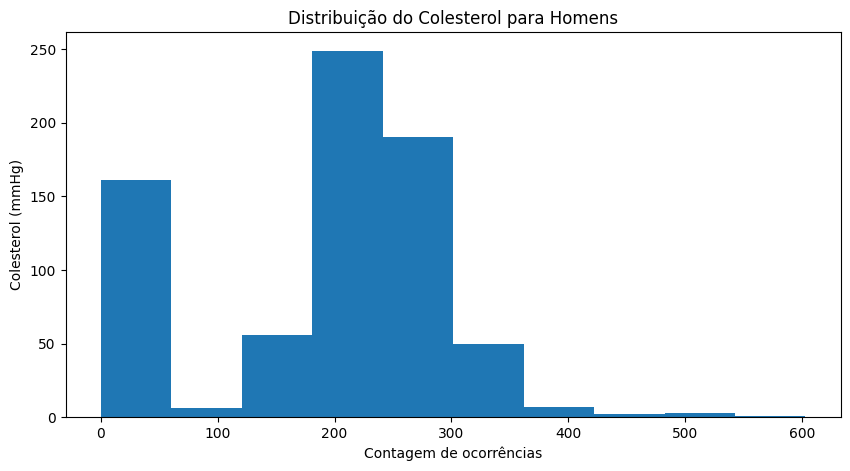

In [147]:
fig, ax = plt.subplots(figsize=(10,5))

mascara = df['sexo'] == 'Homem'
ax.hist(df[mascara]['colesterol'])

ax.set_title('Distribuição do Colesterol para Homens')
ax.set_xlabel('Contagem de ocorrências')
ax.set_ylabel('Colesterol (mmHg)')
plt.show()

Podemos ver que há uma grande concentração de registros entre 100 e 400, mas podemos aumentar quantidade de barras e ver a distribuição com mais detalhes.

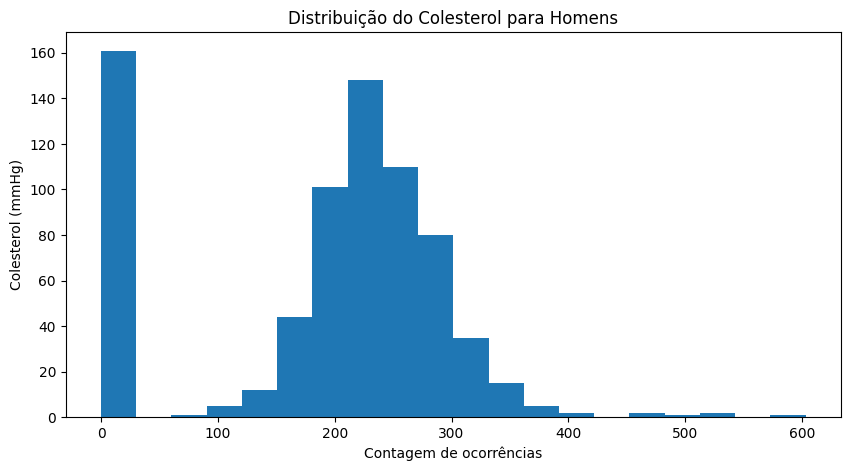

In [148]:
fig, ax = plt.subplots(figsize=(10,5))

mask_h = df['sexo'] == 'Homem'
ax.hist(
    df[mask_h]['colesterol'],
    bins=20
    )

ax.set_title('Distribuição do Colesterol para Homens')
ax.set_xlabel('Contagem de ocorrências')
ax.set_ylabel('Colesterol (mmHg)')
plt.show()

Com a distribuição mais detalhada, vemos uma concentração de ocorrências abaixo de 50, entre 100 e 400 temos muitos dados e valores próximos a 600 mmHg.<br>

Vamos comparar essas distribuição ao colesterol de mulheres.<br>
Para isso vamos plotar outro histograma na mesma figure vermos lado a lado.<br>

Como mostrado na introdução, a Figure é um quadro e podemos inserir vários Axes nele.

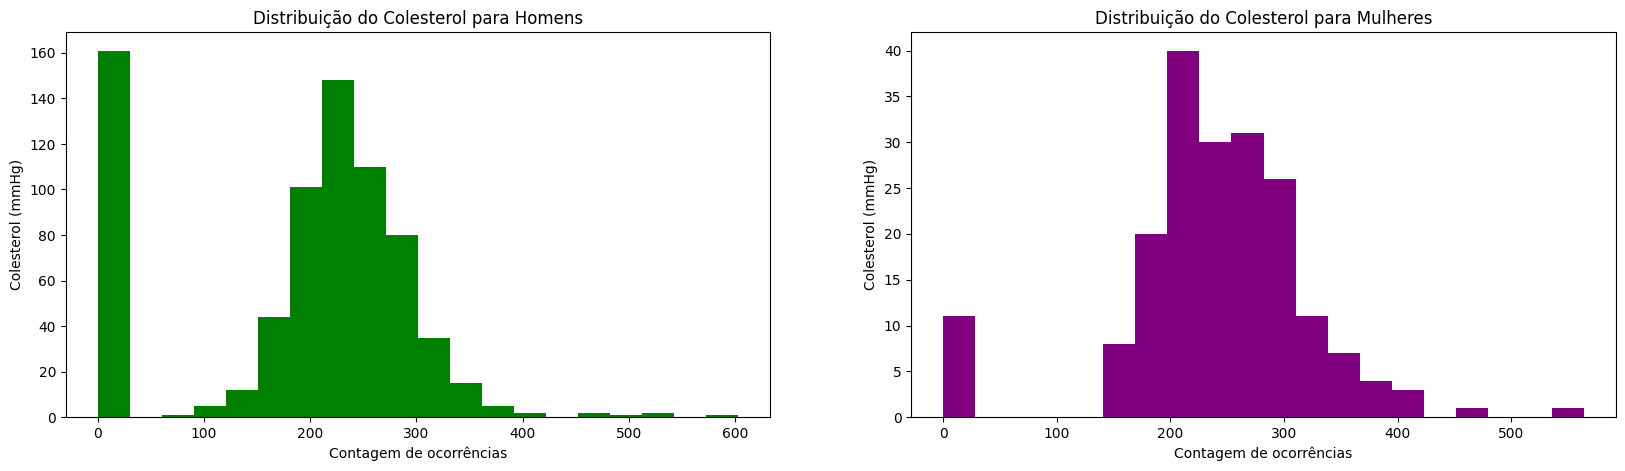

In [149]:
fig, axs = plt.subplots(
    nrows=1, # Quantidade de linhas na figure
    ncols=2, # Quantidade de colunas na figure (2, pois vamos plotar um gráfico ao lado do outro)
    figsize=(20,5) # Vamos aumentar a largura da Figure
)

# Máscaras
mask_h = df['sexo'] == 'Homem'
mask_m = df['sexo'] == 'Mulher'

# Primeiro gráfico
axs[0].hist(df[mask_h]['colesterol'], bins=20, color='green')
axs[0].set_title('Distribuição do Colesterol para Homens')
axs[0].set_xlabel('Contagem de ocorrências')
axs[0].set_ylabel('Colesterol (mmHg)')

# Segundo gráfico
axs[1].hist(df[mask_m]['colesterol'], bins=20, color='purple')
axs[1].set_title('Distribuição do Colesterol para Mulheres')
axs[1].set_xlabel('Contagem de ocorrências')
axs[1].set_ylabel('Colesterol (mmHg)')

plt.show()

Podemos ver que existe uma concentração do colesterol para mulheres entre 150 a 400, mas que há pouco mais de 10 registros de colesterol abaixo de 50 - o que pode ter causado a média superior.

## **Boxplot**
O boxplot é um gráfico que, apesar de não ser tão intuitivo para leigos, mostra-se muito completo quando passamos a entendê-lo.<br>

O boxplot mostra a distribuição dos dados e as divide por percentis.<br>

<img src="Imagens/box-plot.webp" alt="boxplot" width="800">
<br>

[Fonte](https://medium.com/@guinatan.silva/boxplot-diagrama-de-caixa-fc59590a8f30)

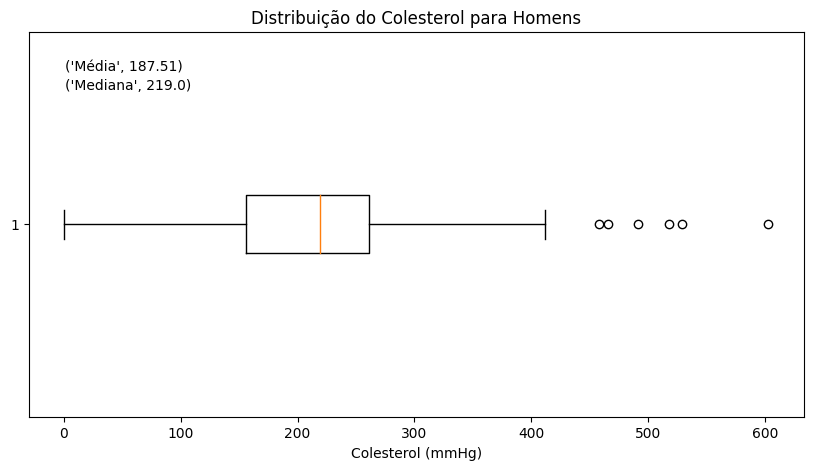

In [150]:
fig, ax = plt.subplots(figsize=(10,5))

mask_h = df['sexo'] == 'Homem'
ax.boxplot(
    df[mask_h]['colesterol'], 
    vert=False, # Define a orientação do boxplot para horizontal
    )

ax.set_title('Distribuição do Colesterol para Homens')
ax.set_xlabel('Colesterol (mmHg)')
ax.text(1,1.4,('Média', df[mask_h]['colesterol'].mean().round(2)))
ax.text(1,1.35,('Mediana', df[mask_h]['colesterol'].median().round(2)))
plt.show()

Podemos observar:
- A mediana é superior à média - concentração de mais dados abaixo de 200 causa isso;
- Podemos considerar que temos outliers acima de 400.

O box-plot tem uma relação visual direta com o histograma. Vamos plotar os 2 na mesma figure e compará-los.

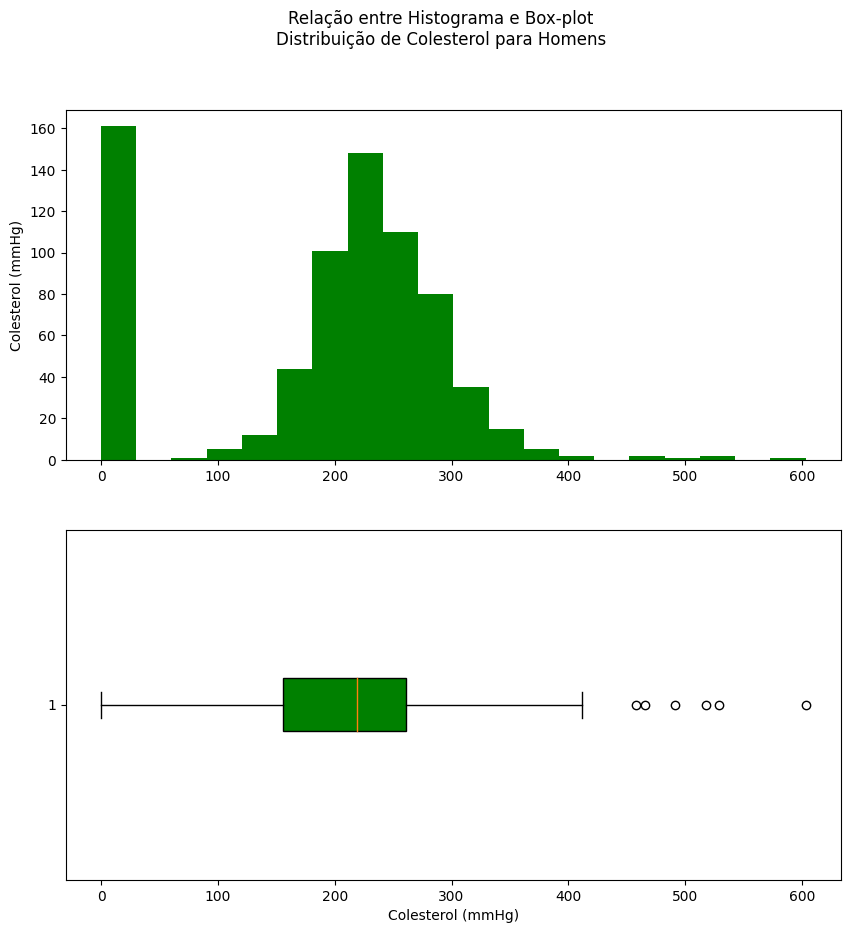

In [151]:
fig, axs = plt.subplots(
    nrows=2, 
    ncols=1, # Quantidade de colunas na figure (2, pois vamos plotar um gráfico ao lado do outro)
    figsize=(10,10) # Vamos aumentar a largura da Figure
)

# Título da Figure
fig.suptitle('Relação entre Histograma e Box-plot\n'
             'Distribuição de Colesterol para Homens')

mask_h = df['sexo'] == 'Homem'

# Histograma
axs[0].hist(df[mask_h]['colesterol'], bins=20, color='green')
axs[0].set_ylabel('Colesterol (mmHg)')

# Box-plot
axs[1].boxplot(
    df[mask_h]['colesterol'], 
    vert=False, 
    boxprops={'facecolor':'green'}, # Define a cor de preenchimento do box-plot
    patch_artist=True # Habilita as customizações do boxprops
    )
axs[1].set_xlabel('Colesterol (mmHg)')

plt.show()

- Os limites dos braços do box-plot ficam alinhados à concentração dos dados no histograma;
- Além desses limites, encontram-se os outliers.

Podemos dizer que estes dois são visuais podem completar um ao outro. Enquanto o histograma nos dá a dimensão da quantidade de registros na distribuição, o box-plot nos mostra as divisões quantílicas e vemos melhor a dispersão dos dados e outliers.

# **Visualizando séries temporais**
[contextualizar]

In [152]:
df = pd.read_csv('Dados/raw_sales.csv')
display(df.head())
display(df.info())

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


None

In [153]:
# Tradução de colunas
nomes = {
    'datesold':'data_venda',
    'postcode':'cod_postal',
    'price':'preco',
    'propertyType':'tipo_imovel',
    'bedrooms':'quartos'
}
df = df.rename(columns=nomes)

# Corrigindo a tipagem da coluna datesold
df['data_venda'] = pd.to_datetime(df['data_venda'], format='%Y-%m-%d %H:%M:%S')

# Cria uma coluna de ID
df['id_venda'] = df.index.astype(str) + '_' + df['data_venda'].astype(str) + '_' + df['tipo_imovel']

display(df.head())
display(df.info())

,data_venda,cod_postal,preco,tipo_imovel,quartos,id_venda
0,2007-02-07,2607,525000,house,4,0_2007-02-07_house
1,2007-02-27,2906,290000,house,3,1_2007-02-27_house
2,2007-03-07,2905,328000,house,3,2_2007-03-07_house
3,2007-03-09,2905,380000,house,4,3_2007-03-09_house
4,2007-03-21,2906,310000,house,3,4_2007-03-21_house


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data_venda   29580 non-null  datetime64[ns]
 1   cod_postal   29580 non-null  int64         
 2   preco        29580 non-null  int64         
 3   tipo_imovel  29580 non-null  object        
 4   quartos      29580 non-null  int64         
 5   id_venda     29580 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.4+ MB


None

## **Gráfico de linhas**
[contextualizar]

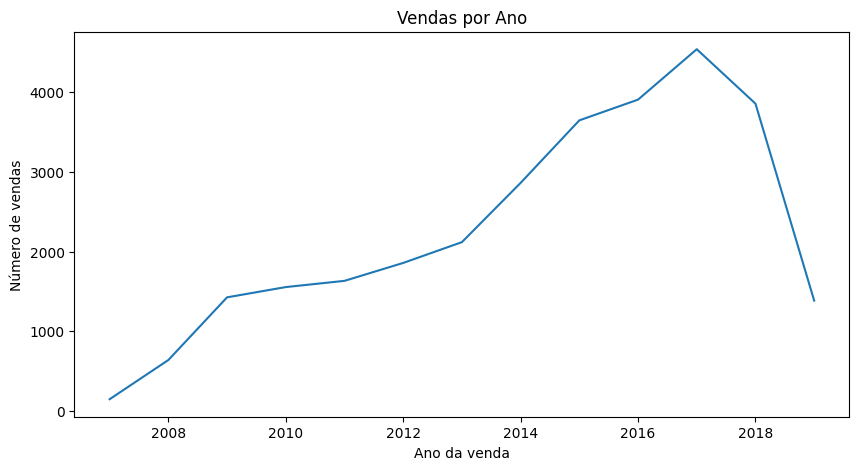

In [154]:
# Criando uma coluna com o ano da venda
df['ano_venda'] = df['data_venda'].dt.year

# Agrupando a quantidade de vendas pelo ano
agrupamento_serie = df[['ano_venda', 'id_venda']].groupby(by=['ano_venda']).count()

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(
    agrupamento_serie.index,
    agrupamento_serie['id_venda']
)

ax.set_title('Vendas por Ano')
ax.set_xlabel('Ano da venda')
ax.set_ylabel('Número de vendas')

plt.show()

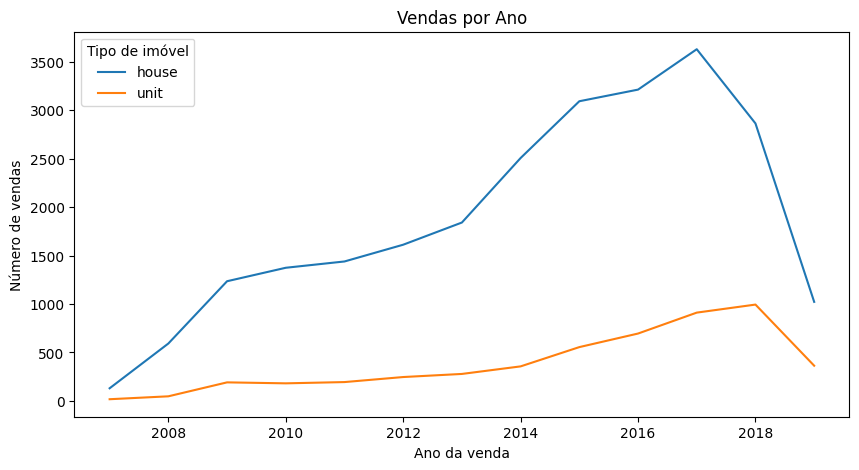

In [155]:
# Agrupando a quantidade de vendas pelo ano e tipo do imóvel
agrupamento_serie = df[['ano_venda', 'id_venda', 'tipo_imovel']].groupby(by=['ano_venda', 'tipo_imovel']).count()

fig, ax = plt.subplots(figsize=(10,5))

for tipo in df['tipo_imovel'].unique():
    ax.plot(
        agrupamento_serie.xs(tipo, level='tipo_imovel').index,
        agrupamento_serie.xs(tipo, level='tipo_imovel')['id_venda'],
        label=tipo
    )

ax.set_title('Vendas por Ano')
ax.set_xlabel('Ano da venda')
ax.set_ylabel('Número de vendas')
ax.legend(title='Tipo de imóvel', loc='upper left')

plt.show()


# **Mosaico**

# **Boas Práticas na Estilização de Gráficos**

[Urban Institute Guide](https://urbaninstitute.github.io/graphics-styleguide/)

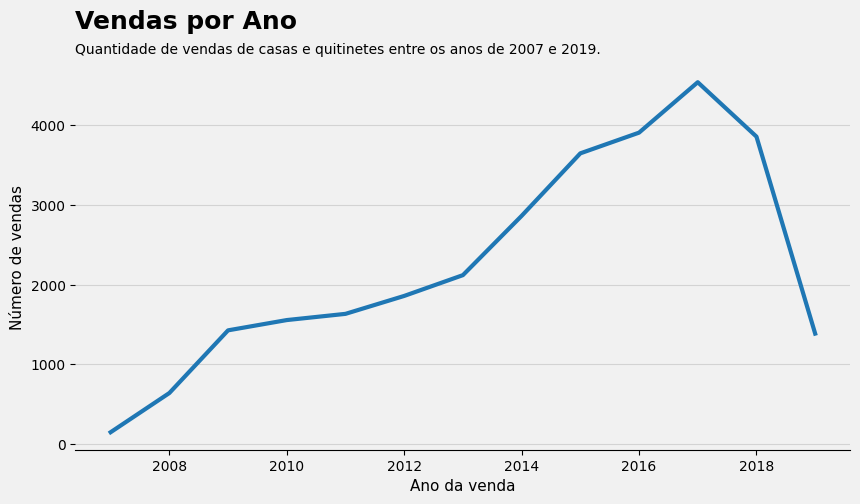

In [216]:
agrupamento_serie = df[['ano_venda', 'id_venda']].groupby(by=['ano_venda']).count()

fig, ax = plt.subplots(
    figsize=(10,5), 
    facecolor='#F1F1F1' # Define a cor de fundo da Figure
    )

ax.plot(
    agrupamento_serie.index,
    agrupamento_serie['id_venda'],
    linewidth=3
)

ax.set_title('Vendas por Ano\n', fontsize=18, loc='left', fontweight='bold')
ax.set_xlabel('Ano da venda', fontsize=11)
ax.set_ylabel('Número de vendas', fontsize=11)

# Define a cor de fundo do Axes
ax.set_facecolor('#F1F1F1') 

# Remove as bordas superior e direita do Axes
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Subtítulo
ax.text(0,1.03,'Quantidade de vendas de casas e quitinetes entre os anos de 2007 e 2019.',transform=ax.transAxes)

ax.grid(axis='y', color='lightgrey')

plt.show()